In [63]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import random
import math

# Define your map dictionaries
map_10_dict = {
    0: {'pos': (0.7798606835438107, 0.6922727646627362), 'connections': [7, 6, 5]},
    1: {'pos': (0.7647837074641568, 0.3252670836724646), 'connections': [4, 3, 2]},
    2: {'pos': (0.7155217893995438, 0.20026498027300055), 'connections': [4, 3, 1]},
    3: {'pos': (0.7076566826610747, 0.3278339270610988), 'connections': [5, 4, 1, 2]},
    4: {'pos': (0.8325506249953353, 0.02310946309985762), 'connections': [1, 2, 3]},
    5: {'pos': (0.49016747075266875, 0.5464878695400415), 'connections': [7, 0, 3]},
    6: {'pos': (0.8820353070895344, 0.6791919587749445), 'connections': [0]},
    7: {'pos': (0.46247219371675075, 0.6258061621642713), 'connections': [0, 5]},
    8: {'pos': (0.11622158839385677, 0.11236327488812581), 'connections': [9]},
    9: {'pos': (0.1285377678230034, 0.3285840695698353), 'connections': [8]}
}

map_40_dict = {
    0: {'pos': (0.7801603911549438, 0.49474860768712914), 'connections': [36, 34, 31, 28, 17]},
    1: {'pos': (0.5249831588690298, 0.14953665513987202), 'connections': [35, 31, 27, 26, 25, 20, 18, 17, 15, 6]},
    2: {'pos': (0.8085335344099086, 0.7696330846542071), 'connections': [39, 36, 21, 19, 9, 7, 4]},
    3: {'pos': (0.2599134798656856, 0.14485659826020547), 'connections': [35, 20, 15, 11, 6]},
    4: {'pos': (0.7353838928272886, 0.8089961609345658), 'connections': [39, 36, 21, 19, 9, 7, 2]},
    5: {'pos': (0.09088671576431506, 0.7222846879290787), 'connections': [32, 16, 14]},
    6: {'pos': (0.313999018186756, 0.01876171413125327), 'connections': [35, 20, 15, 11, 1, 3]},
    7: {'pos': (0.6824813442515916, 0.8016111783687677), 'connections': [39, 36, 22, 21, 19, 9, 2, 4]},
    8: {'pos': (0.20128789391122526, 0.43196344222361227), 'connections': [33, 30, 14]},
    9: {'pos': (0.8551947714242674, 0.9011339078096633), 'connections': [36, 21, 19, 2, 4, 7]},
    10: {'pos': (0.7581736589784409, 0.24026772497187532), 'connections': [31, 27, 26, 25, 24, 18, 17, 13]},
    11: {'pos': (0.25311953895059136, 0.10321622277398101), 'connections': [35, 20, 15, 3, 6]},
    12: {'pos': (0.4813859169876731, 0.5006237737207431), 'connections': [37, 34, 31, 28, 22, 17]},
    13: {'pos': (0.9112422509614865, 0.1839028760606296), 'connections': [27, 24, 18, 10]},
    14: {'pos': (0.04580558670435442, 0.5886703168399895), 'connections': [33, 30, 16, 5, 8]},
    15: {'pos': (0.4582523173083307, 0.1735506267461867), 'connections': [35, 31, 26, 25, 20, 17, 1, 3, 6, 11]},
    16: {'pos': (0.12939557977525573, 0.690016328140396), 'connections': [37, 30, 5, 14]},
    17: {'pos': (0.607698913404794, 0.362322730884702), 'connections': [34, 31, 28, 26, 25, 18, 0, 1, 10, 12, 15]},
    18: {'pos': (0.719569201584275, 0.13985272363426526), 'connections': [31, 27, 26, 25, 24, 1, 10, 13, 17]},
    19: {'pos': (0.8860336256842246, 0.891868301175821), 'connections': [21, 2, 4, 7, 9]},
    20: {'pos': (0.4238357358399233, 0.026771817842421997), 'connections': [35, 26, 1, 3, 6, 11, 15]},
    21: {'pos': (0.8252497121120052, 0.9532681441921305), 'connections': [2, 4, 7, 9, 19]},
    22: {'pos': (0.47415009287034726, 0.7353428557575755), 'connections': [39, 37, 29, 7, 12]},
    23: {'pos': (0.26253385360950576, 0.9768234503830939), 'connections': [38, 32, 29]},
    24: {'pos': (0.9363713903322148, 0.13022993020357043), 'connections': [27, 10, 13, 18]},
    25: {'pos': (0.6243437191127235, 0.21665962402659544), 'connections': [34, 31, 27, 26, 1, 10, 15, 17, 18]},
    26: {'pos': (0.5572917679006295, 0.2083567880838434), 'connections': [34, 31, 27, 1, 10, 15, 17, 18, 20, 25]},
    27: {'pos': (0.7482655725962591, 0.12631654071213483), 'connections': [31, 1, 10, 13, 18, 24, 25, 26]},
    28: {'pos': (0.6435799740880603, 0.5488515965193208), 'connections': [39, 36, 34, 31, 0, 12, 17]},
    29: {'pos': (0.34509802713919313, 0.8800306496459869), 'connections': [38, 37, 32, 22, 23]},
    30: {'pos': (0.021423673670808885, 0.4666482714834408), 'connections': [33, 8, 14, 16]},
    31: {'pos': (0.640952694324525, 0.3232711412508066), 'connections': [34, 0, 1, 10, 12, 15, 17, 18, 25, 26, 27, 28]},
    32: {'pos': (0.17440205342790494, 0.9528527425842739), 'connections': [38, 5, 23, 29]},
    33: {'pos': (0.1332965908314021, 0.3996510641743197), 'connections': [8, 14, 30]},
    34: {'pos': (0.583993110207876, 0.42704536740474663), 'connections': [0, 12, 17, 25, 26, 28, 31]},
    35: {'pos': (0.3073865727705063, 0.09186645974288632), 'connections': [1, 3, 6, 11, 15, 20]},
    36: {'pos': (0.740625863119245, 0.68128520136847), 'connections': [39, 0, 2, 4, 7, 9, 28]},
    37: {'pos': (0.3345284735051981, 0.6569436279895382), 'connections': [12, 16, 22, 29]},
    38: {'pos': (0.17972981733780147, 0.999395685828547), 'connections': [23, 29, 32]},
    39: {'pos': (0.6315322816286787, 0.7311657634689946), 'connections': [2, 4, 7, 22, 28, 36]}
}

# Map class definition
class Map:
    def __init__(self, G):
        self._graph = G
        self.intersections = nx.get_node_attributes(G, "pos")
        self.roads = [list(G.neighbors(node)) for node in G.nodes()]

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self._graph, f)

# Function to load map graph from dictionary data
def load_map_graph(map_dict):
    G = nx.Graph()
    for node in map_dict.keys():
        G.add_node(node, pos=map_dict[node]['pos'])
    for node in map_dict.keys():
        for con_node in map_dict[node]['connections']:
            G.add_edge(node, con_node)
    return G

def load_map_10():
    G = load_map_graph(map_10_dict)
    return Map(G)

def load_map_40():
    G = load_map_graph(map_40_dict)
    return Map(G)

# Function to display the map using Matplotlib
def show_map(M, start=None, goal=None, path=None):
    G = M._graph
    pos = nx.get_node_attributes(G, 'pos')

    # Assign colors based on start, goal, or if node is in the path
    node_colors = []
    for node in G.nodes():
        if path and node in path:
            node_colors.append("green")
        elif node == start:
            node_colors.append("blue")
        elif node == goal:
            node_colors.append("red")
        else:
            node_colors.append("gray")

    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='black', node_size=300)
    plt.title("Network Graph")
    plt.show()


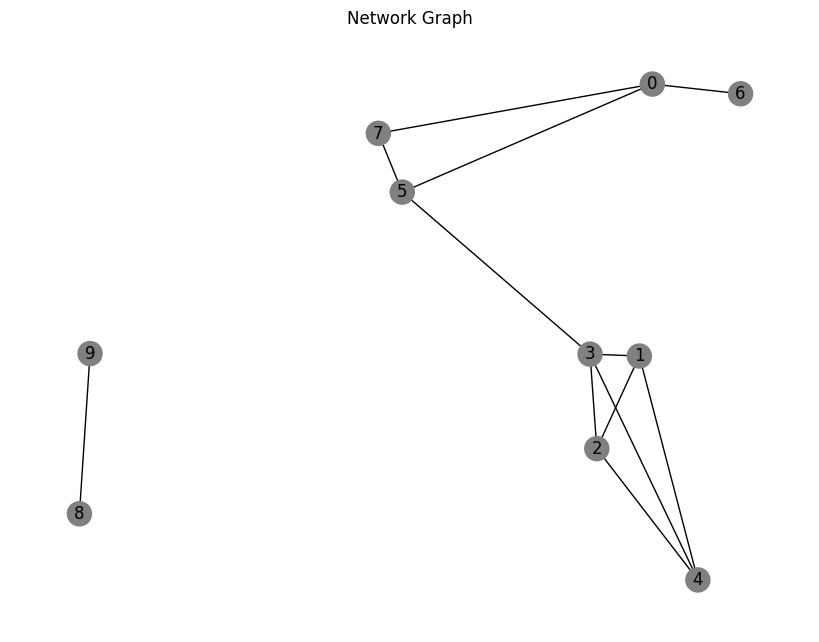

In [64]:
%reload_ext autoreload
%autoreload 2

# Load the map and display it using Matplotlib
map_10 = load_map_10()
show_map(map_10)

In [65]:
map_10.intersections
#map_10.intersections[0][0]

{0: (0.7798606835438107, 0.6922727646627362),
 1: (0.7647837074641568, 0.3252670836724646),
 2: (0.7155217893995438, 0.20026498027300055),
 3: (0.7076566826610747, 0.3278339270610988),
 4: (0.8325506249953353, 0.02310946309985762),
 5: (0.49016747075266875, 0.5464878695400415),
 6: (0.8820353070895344, 0.6791919587749445),
 7: (0.46247219371675075, 0.6258061621642713),
 8: (0.11622158839385677, 0.11236327488812581),
 9: (0.1285377678230034, 0.3285840695698353)}

In [66]:
# this shows that intersection 0 connects to intersections 7, 6, and 5
map_10.roads[0]

[7, 6, 5]

In [67]:
# This shows the full connectivity of the map
map_10.roads

[[7, 6, 5],
 [4, 3, 2],
 [1, 4, 3],
 [1, 2, 5, 4],
 [1, 2, 3],
 [0, 3, 7],
 [0],
 [0, 5],
 [9],
 [8]]

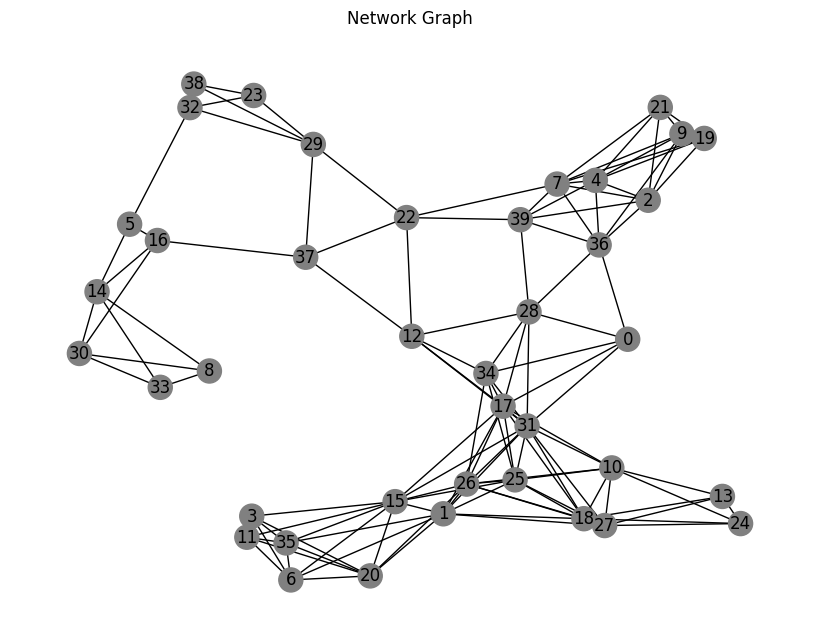

In [68]:
# map_40 is a bigger map than map_10
map_40 = load_map_40()
show_map(map_40)

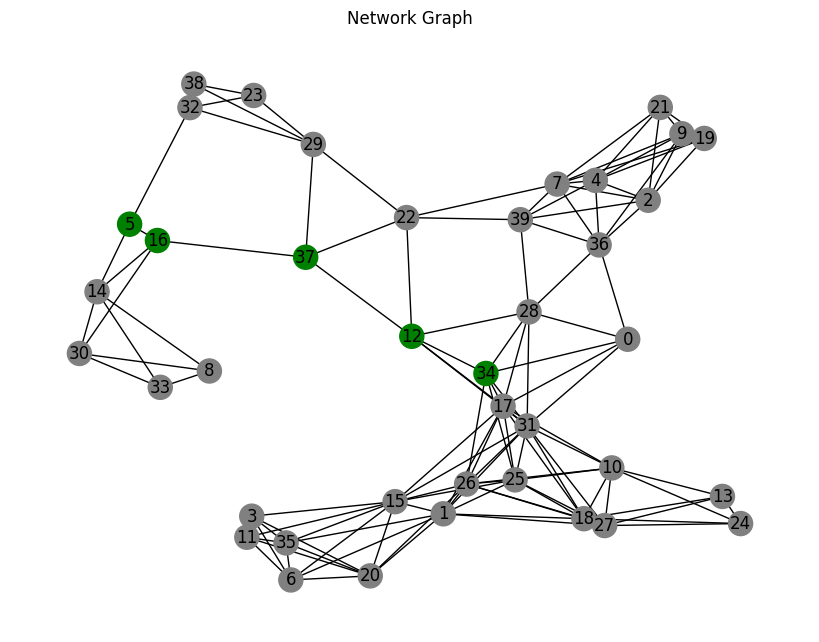

In [69]:
# run this code, note the effect of including the optional
# parameters in the function call.
show_map(map_40, start=5, goal=34, path=[5,16,37,12,34])

In [70]:
class PathPlanner():
    """Construct a PathPlanner Object"""
    def __init__(self, M, start=None, goal=None):
        """ """
        self.map = M
        self.start= start
        self.goal = goal
        self.closedSet = self.create_closedSet() if goal != None and start != None else None
        self.openSet = self.create_openSet() if goal != None and start != None else None
        self.cameFrom = self.create_cameFrom() if goal != None and start != None else None
        self.gScore = self.create_gScore() if goal != None and start != None else None
        self.fScore = self.create_fScore() if goal != None and start != None else None
        self.path = self.run_search() if self.map and self.start != None and self.goal != None else None

    def reconstruct_path(self, current):
        """ Reconstructs path after search """
        total_path = [current]
        while current in self.cameFrom.keys():
            current = self.cameFrom[current]
            total_path.append(current)
        return total_path

    def _reset(self):
        """Private method used to reset the closedSet, openSet, cameFrom, gScore, fScore, and path attributes"""
        self.closedSet = None
        self.openSet = None
        self.cameFrom = None
        self.gScore = None
        self.fScore = None
        self.path = self.run_search() if self.map and self.start and self.goal else None

    def run_search(self):
        """ """
        if self.map == None:
            raise(ValueError, "Must create map before running search. Try running PathPlanner.set_map(start_node)")
        if self.goal == None:
            raise(ValueError, "Must create goal node before running search. Try running PathPlanner.set_goal(start_node)")
        if self.start == None:
            raise(ValueError, "Must create start node before running search. Try running PathPlanner.set_start(start_node)")

        self.closedSet = self.closedSet if self.closedSet != None else self.create_closedSet()
        self.openSet = self.openSet if self.openSet != None else  self.create_openSet()
        self.cameFrom = self.cameFrom if self.cameFrom != None else  self.create_cameFrom()
        self.gScore = self.gScore if self.gScore != None else  self.create_gScore()
        self.fScore = self.fScore if self.fScore != None else  self.create_fScore()

        while not self.is_open_empty():
            current = self.get_current_node()

            if current == self.goal:
                self.path = [x for x in reversed(self.reconstruct_path(current))]
                return self.path
            else:
                self.openSet.remove(current)
                self.closedSet.add(current)

            for neighbor in self.get_neighbors(current):
                if neighbor in self.closedSet:
                    continue    # Ignore the neighbor which is already evaluated.

                if not neighbor in self.openSet:    # Discover a new node
                    self.openSet.add(neighbor)

                # The distance from start to a neighbor
                #the "dist_between" function may vary as per the solution requirements.
                if self.get_tentative_gScore(current, neighbor) >= self.get_gScore(neighbor):
                    continue        # This is not a better path.

                # This path is the best until now. Record it!
                self.record_best_path_to(current, neighbor)
        print("No Path Found")
        self.path = None
        return False

In [71]:
def create_closedSet(self):
    """ Creates and returns a data structure suitable to hold the set of nodes already evaluated"""
    # EXAMPLE: return a data structure suitable to hold the set of nodes already evaluated
    return set()

In [72]:
def create_openSet(self):
    """ Creates and returns a data structure suitable to hold the set of currently discovered nodes
    that are not evaluated yet. Initially, only the start node is known."""
    if self.start != None:
        # TODO: return a data structure suitable to hold the set of currently discovered nodes
        # that are not evaluated yet. Make sure to include the start node.
        openSet = set()
        openSet.add(self.start)
        return openSet

    raise(ValueError, "Must create start node before creating an open set. Try running PathPlanner.set_start(start_node)")

In [73]:
def create_cameFrom(self):
    """Creates and returns a data structure that shows which node can most efficiently be reached from another,
    for each node."""
    # TODO: return a data structure that shows which node can most efficiently be reached from another,
    # for each node.
    cameFrom = {}
    return cameFrom

In [74]:
def create_gScore(self):
    """Creates and returns a data structure that holds the cost of getting from the start node to that node,
    for each node. The cost of going from start to start is zero."""
    # TODO:  return a data structure that holds the cost of getting from the start node to that node, for each node.
    # for each node. The cost of going from start to start is zero. The rest of the node's values should
    # be set to infinity.
    if self.start != None:
        gScore = {}
        for node in self.map.intersections.keys():
            if node == self.start:
                gScore[node] = 0
            else: gScore[node] = float('inf')
        return gScore
    raise(ValueError, "Must create start node before creating gScore. Try running PathPlanner.set_start(start_node)")

In [75]:
def create_fScore(self):
    """Creates and returns a data structure that holds the total cost of getting from the start node to the goal
    by passing by that node, for each node. That value is partly known, partly heuristic.
    For the first node, that value is completely heuristic."""
    # TODO: return a data structure that holds the total cost of getting from the start node to the goal
    # by passing by that node, for each node. That value is partly known, partly heuristic.
    # For the first node, that value is completely heuristic. The rest of the node's value should be
    # set to infinity.
    if self.start != None:
        fScore = {}
        for node in self.map.intersections.keys():
            if node == self.start:
                fScore[node] = self.heuristic_cost_estimate(self.start)
            else: fScore[node] = float('inf')
        return fScore
    raise(ValueError, "Must create start node before creating fScore. Try running PathPlanner.set_start(start_node)")

In [76]:
def set_map(self, M):
    """Method used to set map attribute """
    self._reset(self)
    self.start = None
    self.goal = None
    # TODO: Set map to new value.
    self.map = M

In [77]:
def set_start(self, start):
    """Method used to set start attribute """
    self._reset(self)
    # TODO: Set start value. Remember to remove goal, closedSet, openSet, cameFrom, gScore, fScore,
    # and path attributes' values.
    self.start = start
    self.goal = None

In [78]:
def set_goal(self, goal):
    """Method used to set goal attribute """
    self._reset(self)
    # TODO: Set goal value.
    self.goal = goal

In [79]:
def is_open_empty(self):
    """returns True if the open set is empty. False otherwise. """
    # TODO: Return True if the open set is empty. False otherwise.
    return not bool(self.openSet)

In [80]:
def get_current_node(self):
    """ Returns the node in the open set with the lowest value of f(node)."""
    # TODO: Return the node in the open set with the lowest value of f(node).
    current = None
    minim = float('inf')
    for node in self.openSet:
        if self.fScore[node] < minim:
            minim = self.fScore[node]
            current = node
    return current

In [81]:
def get_neighbors(self, node):
    """Returns the neighbors of a node"""
    # TODO: Return the neighbors of a node
    return set(self.map.roads[node])

In [82]:
def get_gScore(self, node):
    """Returns the g Score of a node"""
    # TODO: Return the g Score of a node
    return self.gScore[node]

In [83]:
def distance(self, node_1, node_2):
    """ Computes the Euclidean L2 Distance"""
    # TODO: Compute and return the Euclidean L2 Distance
    x1 = self.map.intersections[node_1][0]
    y1 = self.map.intersections[node_1][1]
    x2 = self.map.intersections[node_2][0]
    y2 = self.map.intersections[node_2][1]
    dist = math.sqrt( (x2-x1)**2 + (y2-y1)**2 )
    return dist

In [84]:
def get_tentative_gScore(self, current, neighbor):
    """Returns the tentative g Score of a node"""
    # TODO: Return the g Score of the current node
    # plus distance from the current node to it's neighbors
    g_score_current = self.get_gScore(current)
    dist_current_neighbor = self.distance(current,neighbor)
    return g_score_current+dist_current_neighbor

In [85]:
def heuristic_cost_estimate(self, node):
    """ Returns the heuristic cost estimate of a node """
    # TODO: Return the heuristic cost estimate of a node
    if self.goal != None:
        heuristic_estimate = self.distance(node,self.goal)
        return heuristic_estimate
    raise(ValueError, "Must create goal node before calculating huristic estimate. Try running PathPlanner.set_goal(goal_node)")

In [86]:
def calculate_fscore(self, node):
    """Calculate the f score of a node. """
    # TODO: Calculate and returns the f score of a node.
    # REMEMBER F = G + H
    f_score = self.get_gScore(node) + self.heuristic_cost_estimate(node)
    return f_score


In [87]:
def record_best_path_to(self, current, neighbor):
    """Record the best path to a node """
    # TODO: Record the best path to a node, by updating cameFrom, gScore, and fScore
    self.cameFrom[neighbor] = current
    self.gScore[neighbor] = self.get_tentative_gScore(current,neighbor)
    self.fScore[neighbor] = self.gScore[neighbor] + self.heuristic_cost_estimate(neighbor)

In [88]:
# Associates implemented functions with PathPlanner class
PathPlanner.create_closedSet = create_closedSet
PathPlanner.create_openSet = create_openSet
PathPlanner.create_cameFrom = create_cameFrom
PathPlanner.create_gScore = create_gScore
PathPlanner.create_fScore = create_fScore
PathPlanner.set_map = set_map
PathPlanner.set_start = set_start
PathPlanner.set_goal = set_goal
PathPlanner.is_open_empty = is_open_empty
PathPlanner.get_current_node = get_current_node
PathPlanner.get_neighbors = get_neighbors
PathPlanner.get_gScore = get_gScore
PathPlanner.distance = distance
PathPlanner.get_tentative_gScore = get_tentative_gScore
PathPlanner.heuristic_cost_estimate = heuristic_cost_estimate
PathPlanner.calculate_fscore = calculate_fscore
PathPlanner.record_best_path_to = record_best_path_to

In [89]:
planner = PathPlanner(map_40, 5, 34)
path = planner.path
if path == [5, 16, 37, 12, 34]:
    print("great! Your code works for these inputs!")
else:
    print("something is off, your code produced the following:")
    print(path)

great! Your code works for these inputs!


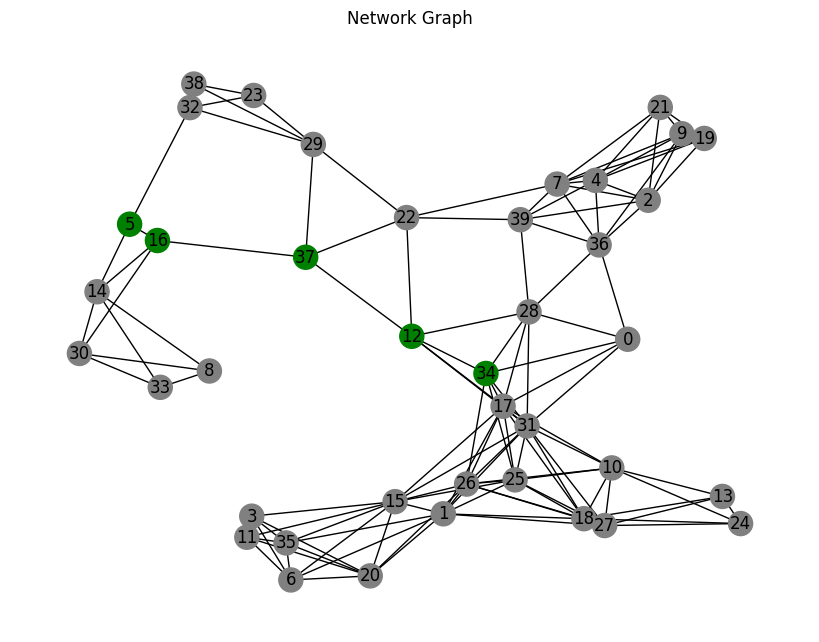

In [90]:
# Visualize your the result of the above test!
start = 5
goal = 34

show_map(map_40, start=start, goal=goal, path=PathPlanner(map_40, start, goal).path)

In [91]:
MAP_40_ANSWERS = [
    (5, 34, [5, 16, 37, 12, 34]),
    (5, 5,  [5]),
    (8, 24, [8, 14, 16, 37, 12, 17, 10, 24])
]

def test(shortest_path_function):
    map_40 = load_map_40()
    correct = 0
    for start, goal, answer_path in MAP_40_ANSWERS:
        path = shortest_path_function(map_40, start, goal).path
        if path == answer_path:
            correct += 1
        else:
            print("For start:", start,
                  "Goal:     ", goal,
                  "Your path:", path,
                  "Correct:  ", answer_path)
    if correct == len(MAP_40_ANSWERS):
        print("All tests pass! Congratulations!")
    else:
        print("You passed", correct, "/", len(MAP_40_ANSWERS), "test cases")


In [92]:
test(PathPlanner)

All tests pass! Congratulations!


#**Main**

Path found: [3, 15, 17, 0, 36, 9]


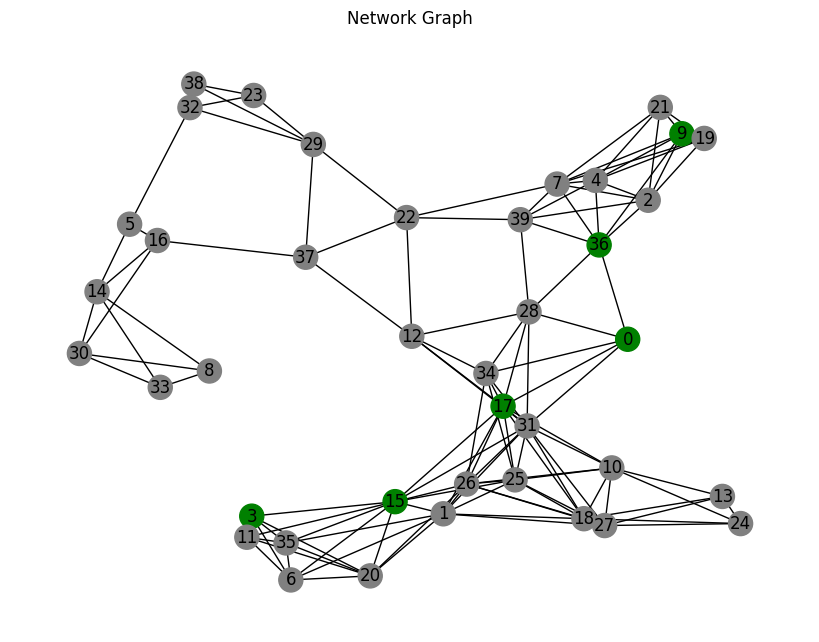

In [93]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import math

# --- Map Dictionaries ---


    
    
map_10_dict = {
    0: {'pos': (0.7798606835438107, 0.6922727646627362), 'connections': [7, 6, 5]},
    1: {'pos': (0.7647837074641568, 0.3252670836724646), 'connections': [4, 3, 2]},
    2: {'pos': (0.7155217893995438, 0.20026498027300055), 'connections': [4, 3, 1]},
    3: {'pos': (0.7076566826610747, 0.3278339270610988), 'connections': [5, 4, 1, 2]},
    4: {'pos': (0.8325506249953353, 0.02310946309985762), 'connections': [1, 2, 3]},
    5: {'pos': (0.49016747075266875, 0.5464878695400415), 'connections': [7, 0, 3]},
    6: {'pos': (0.8820353070895344, 0.6791919587749445), 'connections': [0]},
    7: {'pos': (0.46247219371675075, 0.6258061621642713), 'connections': [0, 5]},
    8: {'pos': (0.11622158839385677, 0.11236327488812581), 'connections': [9]},
    9: {'pos': (0.1285377678230034, 0.3285840695698353), 'connections': [8]}
}
 
# --- Map Class and Loading Functions ---
class Map:
    def __init__(self, G):
        self._graph = G
        self.intersections = nx.get_node_attributes(G, "pos")
        self.roads = [list(G.neighbors(node)) for node in G.nodes()]

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self._graph, f)

def load_map_graph(map_dict):
    G = nx.Graph()
    for node in map_dict.keys():
        G.add_node(node, pos=map_dict[node]['pos'])
    for node in map_dict.keys():
        for con_node in map_dict[node]['connections']:
            G.add_edge(node, con_node)
    return G

def load_map_10():
    G = load_map_graph(map_10_dict)
    return Map(G)

def load_map_40():
    G = load_map_graph(map_40_dict)
    return Map(G)

# --- Visualization Function ---
def show_map(M, start=None, goal=None, path=None):
    G = M._graph
    pos = nx.get_node_attributes(G, 'pos')
    node_colors = []
    for node in G.nodes():
        if path and node in path:
            node_colors.append("green")
        elif node == start:
            node_colors.append("blue")
        elif node == goal:
            node_colors.append("red")
        else:
            node_colors.append("gray")
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='black', node_size=300)
    plt.title("Network Graph")
    plt.show()

# --- Updated PathPlanner for Traffic Light Scenario ---
class PathPlanner():
    def __init__(self, M, start=None, goal=None, heuristic_weight=1.0, traffic_lights=None):
        self.map = M
        self.start = start
        self.goal = goal
        self.heuristic_weight = heuristic_weight
        # traffic_lights: dictionary mapping each node to a waiting delay.
        self.traffic_lights = traffic_lights if traffic_lights is not None else {node: 0 for node in M.intersections.keys()}
        if self.start is not None and self.goal is not None:
            self.closedSet = self.create_closedSet()
            self.openSet = self.create_openSet()
            self.cameFrom = self.create_cameFrom()
            self.gScore = self.create_gScore()
            self.fScore = self.create_fScore()
            self.path = self.run_search()
        else:
            self.closedSet = self.openSet = self.cameFrom = self.gScore = self.fScore = self.path = None

    def reconstruct_path(self, current):
        total_path = [current]
        while current in self.cameFrom:
            current = self.cameFrom[current]
            total_path.append(current)
        return total_path

    def _reset(self):
        self.closedSet = None
        self.openSet = None
        self.cameFrom = None
        self.gScore = None
        self.fScore = None
        if self.map and self.start is not None and self.goal is not None:
            self.path = self.run_search()
        else:
            self.path = None

    def run_search(self):
        if self.map is None or self.start is None or self.goal is None:
            raise ValueError("Map, start, and goal must be set before running search.")
        self.closedSet = self.create_closedSet()
        self.openSet = self.create_openSet()
        self.cameFrom = self.create_cameFrom()
        self.gScore = self.create_gScore()
        self.fScore = self.create_fScore()

        while not self.is_open_empty():
            current = self.get_current_node()
            if current == self.goal:
                return list(reversed(self.reconstruct_path(current)))
            self.openSet.remove(current)
            self.closedSet.add(current)
            for neighbor in self.get_neighbors(current):
                if neighbor in self.closedSet:
                    continue
                if neighbor not in self.openSet:
                    self.openSet.add(neighbor)
                if self.get_tentative_gScore(current, neighbor) >= self.get_gScore(neighbor):
                    continue
                self.record_best_path_to(current, neighbor)
        print("No Path Found")
        self.path = None
        return None

    def create_closedSet(self):
        return set()

    def create_openSet(self):
        if self.start is not None:
            return {self.start}
        raise ValueError("Start node must be set to create openSet.")

    def create_cameFrom(self):
        return {}

    def create_gScore(self):
        if self.start is not None:
            return {node: (0 if node == self.start else float('inf')) for node in self.map.intersections.keys()}
        raise ValueError("Start node must be set to create gScore.")

    def create_fScore(self):
        if self.start is not None:
            return {node: (self.heuristic_cost_estimate(self.start) if node == self.start else float('inf')) for node in self.map.intersections.keys()}
        raise ValueError("Start node must be set to create fScore.")

    def is_open_empty(self):
        return not bool(self.openSet)

    def get_current_node(self):
        current = None
        minim = float('inf')
        for node in self.openSet:
            if self.fScore[node] < minim:
                minim = self.fScore[node]
                current = node
        return current

    def get_neighbors(self, node):
        return set(self.map.roads[node])

    def get_gScore(self, node):
        return self.gScore[node]

    def distance(self, node_1, node_2):
        x1, y1 = self.map.intersections[node_1]
        x2, y2 = self.map.intersections[node_2]
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    def get_tentative_gScore(self, current, neighbor):
        base_cost = self.get_gScore(current) + self.distance(current, neighbor)
        waiting_cost = self.traffic_lights.get(neighbor, 0)
        return base_cost + waiting_cost

    def heuristic_cost_estimate(self, node):
        if self.goal is not None:
            return self.heuristic_weight * self.distance(node, self.goal)
        raise ValueError("Goal node must be set before calculating heuristic.")

    def record_best_path_to(self, current, neighbor):
        self.cameFrom[neighbor] = current
        self.gScore[neighbor] = self.get_tentative_gScore(current, neighbor)
        self.fScore[neighbor] = self.gScore[neighbor] + self.heuristic_cost_estimate(neighbor)

# --- Manual Traffic Light Variables ---
# Define a delay (in seconds) for each node manually.
# A delay of 0 indicates a green light.
node0_delay  = 0
node1_delay  = 0
node2_delay  = 0
node3_delay  = 0
node4_delay  = 0
node5_delay  = 0
node6_delay  = 0
node7_delay  = 0
node8_delay  = 0
node9_delay  = 0
node10_delay = 0
node11_delay = 0
node12_delay = 16   # Simulate a red light at node 12 with a 10-second delay.
node13_delay = 0
node14_delay = 0
node15_delay = 0
node16_delay = 0
node17_delay = 0
node18_delay = 0
node19_delay = 0
node20_delay = 0
node21_delay = 0
node22_delay = 0
node23_delay = 0
node24_delay = 0
node25_delay = 0
node26_delay = 0
node27_delay = 0
node28_delay = 12
node29_delay = 0
node30_delay = 0
node31_delay = 0
node32_delay = 0
node33_delay = 0
node34_delay = 0
node35_delay = 0
node36_delay = 0
node37_delay = 0
node38_delay = 0
node39_delay = 0

# Assemble the traffic light states into a dictionary.
traffic_light_states = {
    0: node0_delay,
    1: node1_delay,
    2: node2_delay,
    3: node3_delay,
    4: node4_delay,
    5: node5_delay,
    6: node6_delay,
    7: node7_delay,
    8: node8_delay,
    9: node9_delay,
    10: node10_delay,
    11: node11_delay,
    12: node12_delay,
    13: node13_delay,
    14: node14_delay,
    15: node15_delay,
    16: node16_delay,
    17: node17_delay,
    18: node18_delay,
    19: node19_delay,
    20: node20_delay,
    21: node21_delay,
    22: node22_delay,
    23: node23_delay,
    24: node24_delay,
    25: node25_delay,
    26: node26_delay,
    27: node27_delay,
    28: node28_delay,
    29: node29_delay,
    30: node30_delay,
    31: node31_delay,
    32: node32_delay,
    33: node33_delay,
    34: node34_delay,
    35: node35_delay,
    36: node36_delay,
    37: node37_delay,
    38: node38_delay,
    39: node39_delay
}


# --- Experiment Configuration ---
MAP_TO_LOAD = load_map_40  # Function to load the map
START_NODE = 3  # Define the start node
GOAL_NODE = 9 # Define the goal node
HEURISTIC_WEIGHT = 100  # Define the heuristic weight


# --- Experiment Function ---
def experiment_traffic_light(map_obj, start, goal, heuristic_weight=1.0, traffic_lights=None):
    """
    traffic_lights: Dictionary mapping node to waiting delay.
                    For example, a value of 0 indicates a green light,
                    while a positive value indicates a red light with that delay.
    """
    planner = PathPlanner(map_obj, start, goal, heuristic_weight, traffic_lights)
    if planner.path is None:
        print("No path found!")
    else:
        print("Path found:", planner.path)
        show_map(map_obj, start=start, goal=goal, path=planner.path)
# --- Example Usage ---
if __name__ == "__main__":
    # Load the selected map
    map_obj = MAP_TO_LOAD()
    # Run the experiment using the manually set traffic light states.
    experiment_traffic_light(map_obj, start=START_NODE, goal=GOAL_NODE, heuristic_weight=HEURISTIC_WEIGHT, traffic_lights=traffic_light_states)
